# Background
저번 연구에서 개별종목(코스모화학)의 이격도를 살펴보았다.  
이번 연구에서는 좀 더 많은 개별종목을 살펴보려고 한다.  
유튜브: https://youtu.be/NCaft9QoWZI

# Import

In [26]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [27]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,1
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,1
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,1
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,1
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,1


# Preprocessing

In [28]:
df['체결시간'] = pd.to_datetime(df['체결시간']).apply(lambda x : x.replace(second=00))

In [29]:
list = []

for i in range(len(df)):
    date = df.iloc[i]['주문일자']
    firm = df.iloc[i]['종목명']
    time = df.iloc[i]['체결시간']
    buy = df.iloc[i]['매수가']
    
    try:
        frame = pd.read_csv('minute/'+date+'_'+firm+'.csv')
        frame['시간'] = pd.to_datetime(frame['시간']).apply(lambda x : x.replace(second=00))
        frame = frame[frame['시간'] == time]
        frame = frame.reset_index(drop=True)
        twenty = frame['20'].iloc[0]
        change = round(((buy-twenty) / twenty)*100, 2)
        
    except:
        change = 0
    
    list.append(change)

    
df['이격도'] = list

In [31]:
df = df[df['이격도'] != 0]
df

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,이격도
92,2022-04-08,2022-04-14 09:24:00,액션스퀘어,5170,0.00,NaN,205500,14.63,16.63,2.00,0,4.74
95,2022-04-08,2022-04-14 09:47:00,코스모화학,16250,-1.85,NaN,5420,11.68,13.06,0.69,1,6.47
105,2022-04-12,2022-04-14 09:45:00,티사이언티픽,4505,-2.11,NaN,57680,20.78,22.65,14.08,1,0.65
106,2022-04-12,2022-04-14 09:55:00,GS글로벌,4050,2.84,NaN,1250,13.92,24.89,5.34,1,1.33
107,2022-04-13,2022-04-14 10:01:00,LG헬로비전,6160,1.95,NaN,37560,19.15,29.98,5.61,1,0.57


# Visualization
이격도와 수익률은 반비례 관계로 보인다.

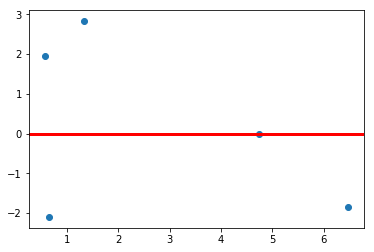

In [35]:
plt.scatter(df.이격도, df.수익률)
plt.axhline(y=0, color='r', linewidth=3)
plt.show()

# Conclusion
이격도가 벌어지면 진입하지 않는다.